In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11687 sha256=3493f653e197fdaac1dc1247aaf4181363f4ea94814ea44d4988db9f303e04b9
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
# from collections import Counter
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, GroupKFold, GridSearchCV, train_test_split, TimeSeriesSplit, RepeatedStratifiedKFold
from sklearn import metrics
import numpy as np
import lightgbm as lgb
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
train.head(30)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [ ]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [ ]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [ ]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


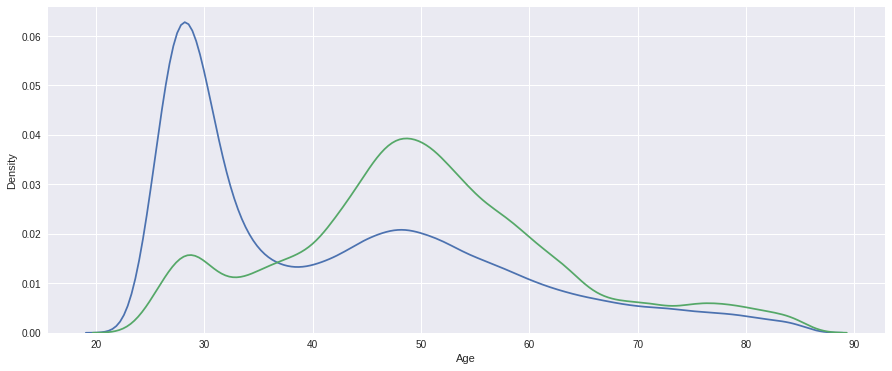

In [ ]:
fig = plt.figure(figsize=(15, 6))
sns.distplot(train.loc[train.Is_Lead==0]["Age"], hist=False,label=0)
sns.distplot(train.loc[train.Is_Lead==1]["Age"], hist=False,label=1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


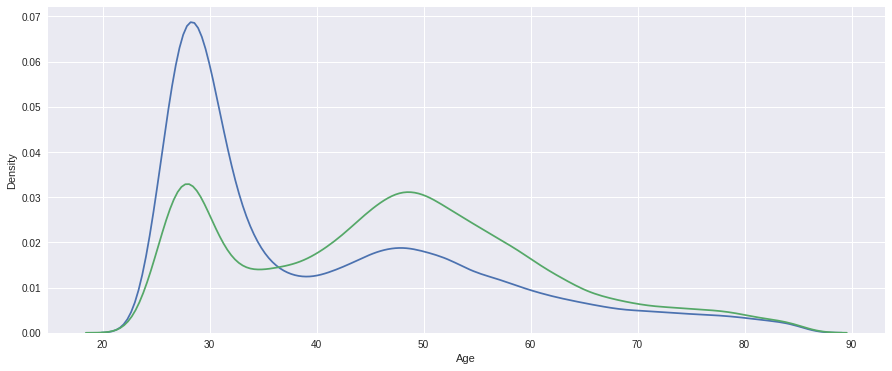

In [ ]:
fig = plt.figure(figsize=(15, 6))
sns.distplot(train.loc[train.Credit_Product=='No']["Age"], hist=False,label=0)
sns.distplot(train.loc[train.Credit_Product=='Yes']["Age"], hist=False,label=1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


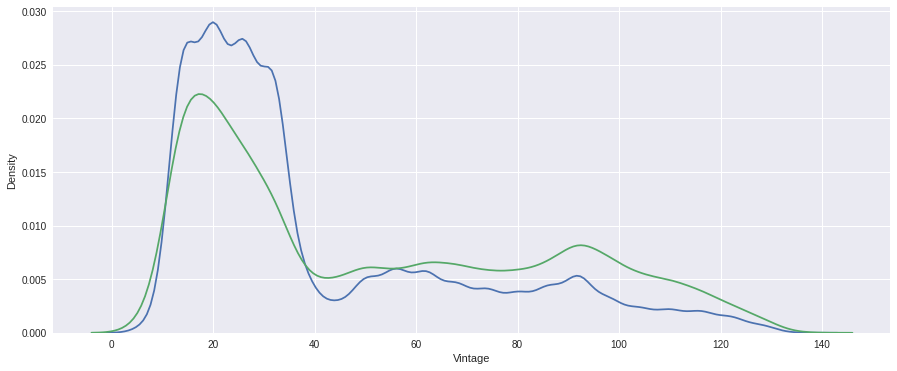

In [ ]:
fig = plt.figure(figsize=(15, 6))
sns.distplot(train.loc[train.Credit_Product=='No']["Vintage"], hist=False,label=0)
sns.distplot(train.loc[train.Credit_Product=='Yes']["Vintage"], hist=False,label=1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


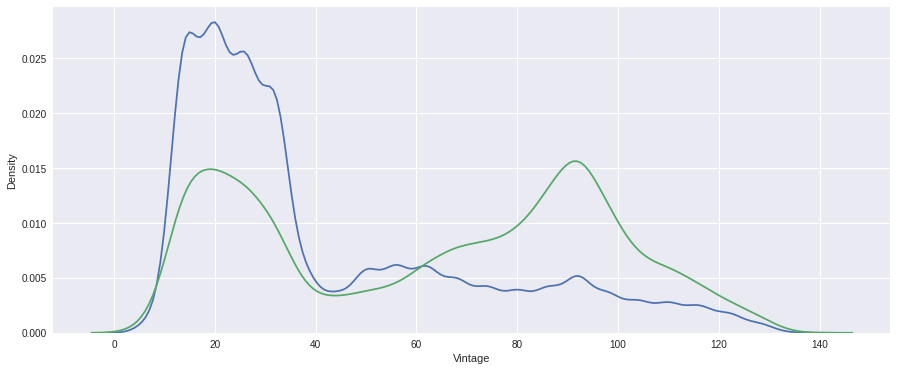

In [ ]:
fig = plt.figure(figsize=(15, 6))
sns.distplot(train.loc[train.Is_Lead==0]["Vintage"], hist=False,label=0)
sns.distplot(train.loc[train.Is_Lead==1]["Vintage"], hist=False,label=1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


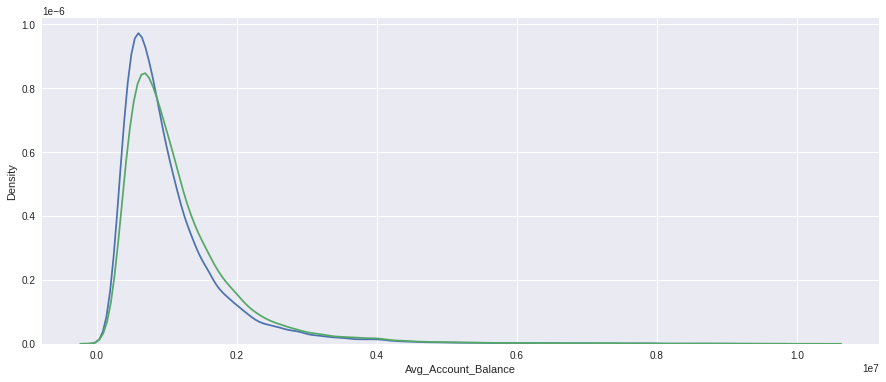

In [ ]:
fig = plt.figure(figsize=(15, 6))
sns.distplot(train.loc[train.Credit_Product=='No']["Avg_Account_Balance"], hist=False,label='No')
sns.distplot(train.loc[train.Credit_Product=='Yes']["Avg_Account_Balance"], hist=False,label='Yes')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


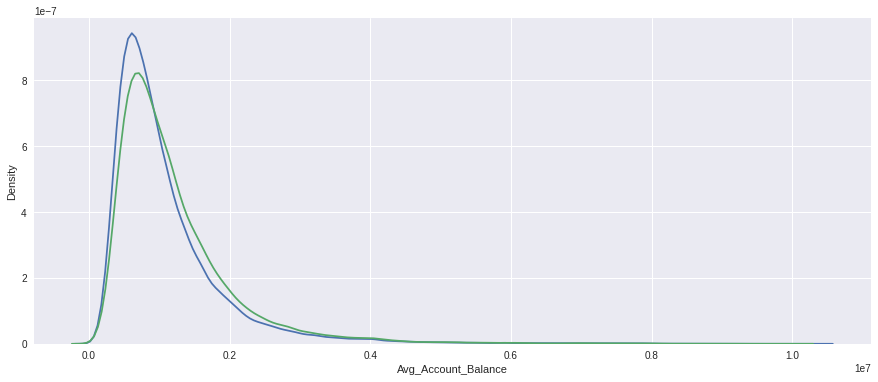

In [ ]:
fig = plt.figure(figsize=(15, 6))
sns.distplot(train.loc[train.Is_Lead==0]["Avg_Account_Balance"], hist=False,label=0)
sns.distplot(train.loc[train.Is_Lead==1]["Avg_Account_Balance"], hist=False,label=1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

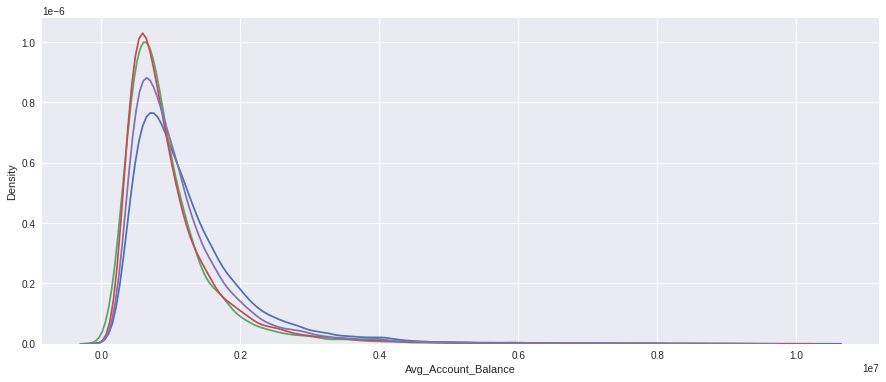

In [ ]:
fig = plt.figure(figsize=(15, 6))
for i in set(list(train['Channel_Code'].values)):
    sns.distplot(train.loc[train.Channel_Code==i]["Avg_Account_Balance"], hist=False,label=i)
# sns.distplot(train.loc[train.Is_Lead==1]["Avg_Account_Balance"], hist=False,label=1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

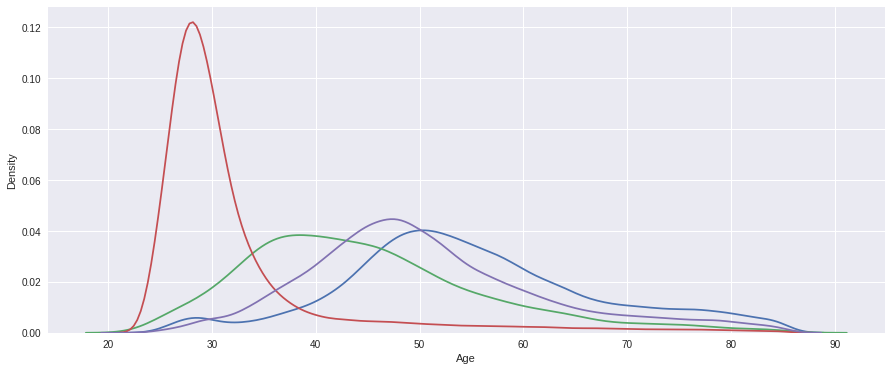

In [ ]:
fig = plt.figure(figsize=(15, 6))
for i in set(list(train['Channel_Code'].values)):
    sns.distplot(train.loc[train.Channel_Code==i]["Age"], hist=False,label=i)
# sns.distplot(train.loc[train.Is_Lead==1]["Avg_Account_Balance"], hist=False,label=1)
plt.show()

<function matplotlib.pyplot.show>

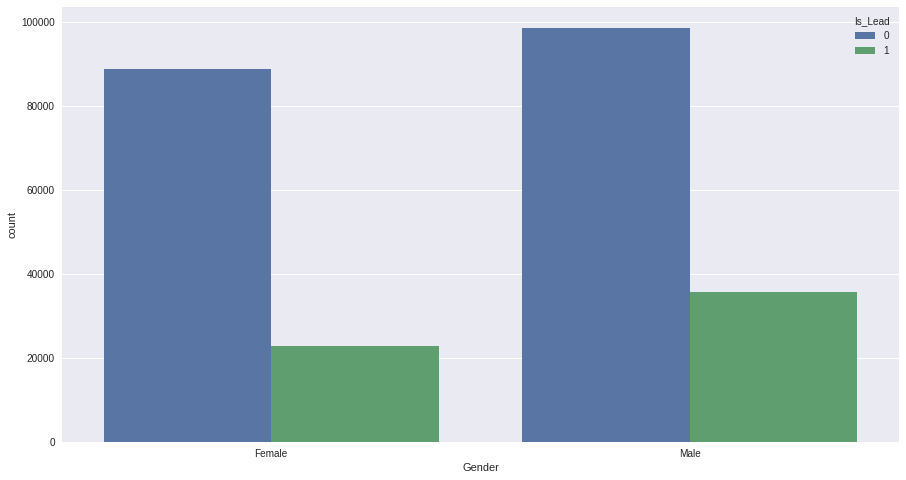

In [ ]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(x="Gender", hue="Is_Lead", data=train)
plt.show

<function matplotlib.pyplot.show>

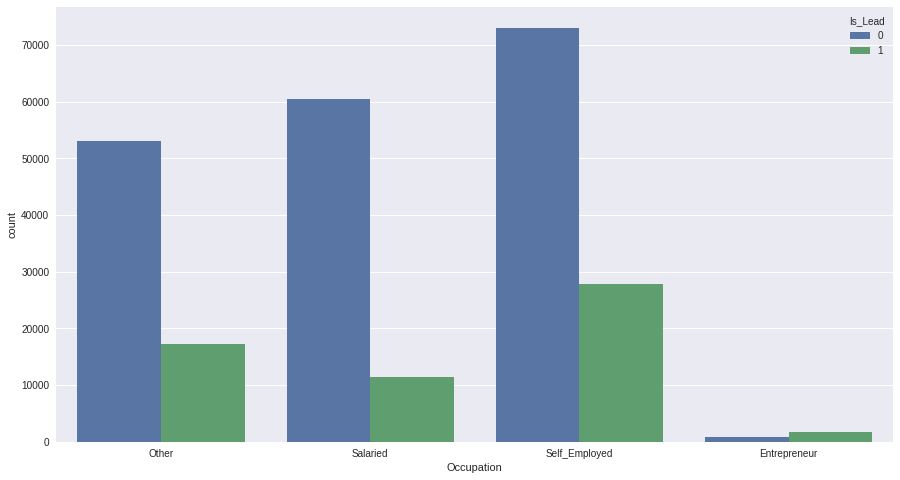

In [ ]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(x="Occupation", hue="Is_Lead", data=train)
plt.show

<function matplotlib.pyplot.show>

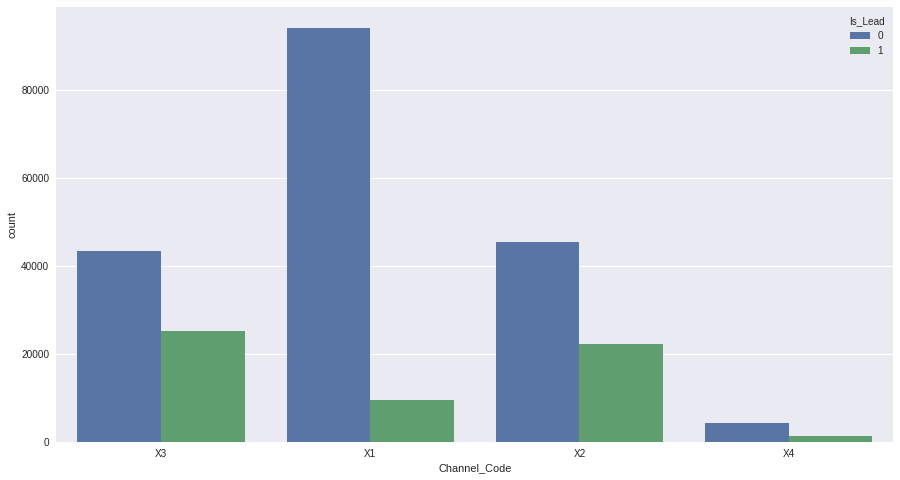

In [ ]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(x="Channel_Code", hue="Is_Lead", data=train)
plt.show

<function matplotlib.pyplot.show>

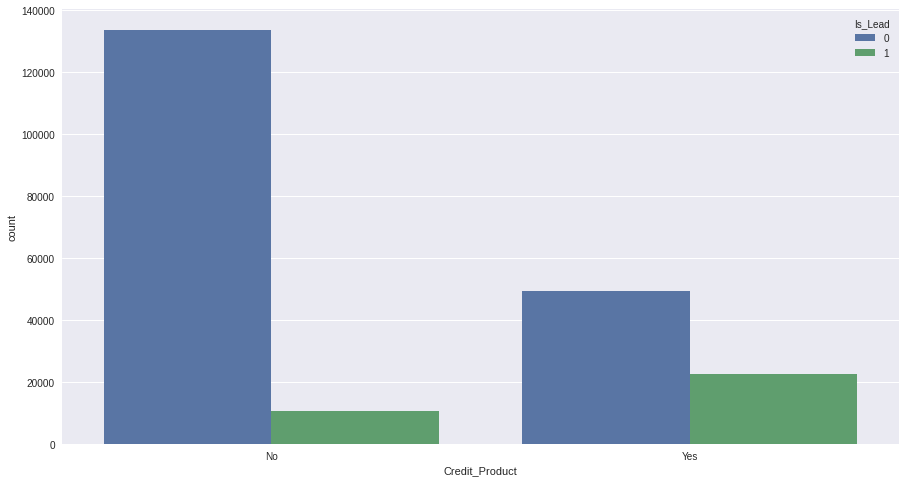

In [ ]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(x="Credit_Product", hue="Is_Lead", data=train)
plt.show

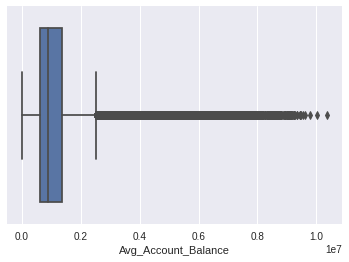

In [ ]:
sns.boxplot(x=train["Avg_Account_Balance"])

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.7MB/s 


In [ ]:
from category_encoders import TargetEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
categorical = ['Channel_Code','Region_Code','Occupation']
continous = ['Age','Vintage','Avg_Account_Balance']
bold = '\033[1m'
end = '\033[0m'

In [ ]:
def return_quartiles(column1, column2):
    q1 = {}
    q3 = {}
    iqr = {}
    values = set(list(train[column2].values))
    for i in values:
        temp_df = train[train[column2] == i]
        Q1 = temp_df[column1].quantile(0.25)
        Q3 = temp_df[column1].quantile(0.75)
        IQR = Q3 - Q1
        
        q1[i] = Q1
        q3[i] = Q3
        iqr[i] = IQR
        
        
    train[column1+'_'+column2+'_'+'q1'] = train[column2].apply(lambda x: q1[x])
    train[column1+'_'+column2+'_'+'q3'] = train[column2].apply(lambda x: q3[x])
    train[column1+'_'+column2+'_'+'iqr'] = train[column2].apply(lambda x: iqr[x])
    
    test[column1+'_'+column2+'_'+'q1'] = test[column2].apply(lambda x: q1[x])
    test[column1+'_'+column2+'_'+'q3'] = test[column2].apply(lambda x: q3[x])
    test[column1+'_'+column2+'_'+'iqr'] = test[column2].apply(lambda x: iqr[x])

In [ ]:
already_done  = []
# print (bold,"Analysis of categorical vs continous variable",end)
print (" ")
for i in categorical:
    for j in continous:
        if (i != j and (i,j) not in already_done and (j,i) not in already_done):
            already_done.append((i,j))
            return_quartiles(j,i)

In [ ]:
train_copy = train.copy()
test_copy = test.copy()
def return_target_encoded(column):
    encoder = TargetEncoder()
    train_copy[column+'_encoded'] = encoder.fit_transform(train_copy[column], train_copy['Is_Lead'])
    test_copy[column+'_encoded'] = encoder.transform(test_copy[column])

In [ ]:
target_enc_columns = ["Region_Code"]

In [ ]:
for i in target_enc_columns:
    return_target_encoded(i)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
train_copy.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_Channel_Code_q1,Age_Channel_Code_q3,Age_Channel_Code_iqr,Vintage_Channel_Code_q1,Vintage_Channel_Code_q3,Vintage_Channel_Code_iqr,Avg_Account_Balance_Channel_Code_q1,Avg_Account_Balance_Channel_Code_q3,Avg_Account_Balance_Channel_Code_iqr,Age_Region_Code_q1,Age_Region_Code_q3,Age_Region_Code_iqr,Vintage_Region_Code_q1,Vintage_Region_Code_q3,Vintage_Region_Code_iqr,Avg_Account_Balance_Region_Code_q1,Avg_Account_Balance_Region_Code_q3,Avg_Account_Balance_Region_Code_iqr,Age_Occupation_q1,Age_Occupation_q3,Age_Occupation_iqr,Vintage_Occupation_q1,Vintage_Occupation_q3,Vintage_Occupation_iqr,Avg_Account_Balance_Occupation_q1,Avg_Account_Balance_Occupation_q3,Avg_Account_Balance_Occupation_iqr,Region_Code_encoded
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,47.0,62.0,15.0,50.0,103.0,53.0,689462.75,1563678.25,874215.50,39.0,58.0,19.0,26.0,91.0,65.0,807803.75,1794108.00,986304.25,33.0,69.0,36.0,25.0,86.0,61.0,638842.00,1482570.0,843728.00,0.299800
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,27.0,33.0,6.0,19.0,31.0,12.0,554142.25,1224684.00,670541.75,30.0,51.0,21.0,20.0,63.0,43.0,562356.75,1166291.00,603934.25,27.0,32.0,5.0,19.0,31.0,12.0,556761.50,1228974.0,672212.50,0.231951
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,47.0,62.0,15.0,50.0,103.0,53.0,689462.75,1563678.25,874215.50,39.0,58.0,19.0,26.0,91.0,65.0,807803.75,1794108.00,986304.25,41.0,53.0,12.0,26.0,85.0,59.0,616006.25,1368817.0,752810.75,0.299800
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,27.0,33.0,6.0,19.0,31.0,12.0,554142.25,1224684.00,670541.75,28.0,44.0,16.0,19.0,31.0,12.0,462292.25,803233.75,340941.50,27.0,32.0,5.0,19.0,31.0,12.0,556761.50,1228974.0,672212.50,0.144301
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,27.0,33.0,6.0,19.0,31.0,12.0,554142.25,1224684.00,670541.75,29.0,51.0,22.0,20.0,61.0,41.0,608341.00,1161814.00,553473.00,27.0,32.0,5.0,19.0,31.0,12.0,556761.50,1228974.0,672212.50,0.192143


In [ ]:
df1 = pd.get_dummies(train_copy[['Channel_Code',
 'Credit_Product',
 'Occupation']
])

train_copy = pd.merge(train_copy, df1, left_index=True, right_index=True)
# train_copy.drop(['Channel_Code',
#  'Credit_Product',
#  'Occupation'],axis =1,inplace =True)

df2 = pd.get_dummies(test_copy[['Channel_Code',
 'Credit_Product',
 'Occupation']
])

test_copy = pd.merge(test_copy, df2, left_index=True, right_index=True)
# test_copy.drop(['Channel_Code',
#  'Credit_Product',
#  'Occupation'],axis =1,inplace =True)

In [ ]:
label_enc_columns = ['Gender']

In [ ]:
le = LabelEncoder()
def return_cat_encod(column):
    train_copy[column+"_encoded"] = le.fit_transform(train_copy[column])
    test_copy[column+"_encoded"] = le.fit_transform(test_copy[column])

In [ ]:
for i in label_enc_columns:
    return_cat_encod(i)

In [ ]:
repl_ = {'Yes':1,'No':0}

# train_copy['Credit_Product_encoded'] = train_copy['Credit_Product'].apply(lambda x: repl_[x] if x == x else x)
train_copy['Is_Active_encoded'] = train_copy['Is_Active'].apply(lambda x: repl_[x] if x == x else x)


# test_copy['Credit_Product_encoded'] = test_copy['Credit_Product'].apply(lambda x: repl_[x] if x == x else x)
test_copy['Is_Active_encoded'] = test_copy['Is_Active'].apply(lambda x: repl_[x] if x == x else x)

In [ ]:
def agg_values(df,df2,column_1, column_2,agg_types):
    for agg_type in agg_types:
        if agg_type == 'mean':
            mapping = dict(df.groupby(column_1).mean()[column_2])
        elif agg_type == 'median':
            mapping = dict(df.groupby(column_1).median()[column_2])
        elif agg_type == 'std':
            mapping = dict(df.groupby(column_1).std()[column_2])
        df[column_1+'_'+column_2+'_'+agg_type] = df[column_1].apply(lambda x: mapping[x])
        df2[column_1+'_'+column_2+'_'+agg_type] = df2[column_1].apply(lambda x: mapping[x])

#     df.groupby(column_1).median()[column_2]
#     df.groupby(column_1).std()[column_2]
    
    

In [ ]:
agg_values(train_copy,test_copy,'Region_Code','Age',['mean','median','std',])
agg_values(train_copy,test_copy,'Region_Code','Avg_Account_Balance',['mean','median','std'])
agg_values(train_copy,test_copy,'Region_Code','Vintage',['mean','median','std'])
agg_values(train_copy,test_copy,'Channel_Code','Avg_Account_Balance',['mean','median','std'])
agg_values(train_copy,test_copy,'Channel_Code','Age',['mean','median','std'])
agg_values(train_copy,test_copy,'Channel_Code','Vintage',['mean','median','std'])
agg_values(train_copy,test_copy,'Occupation','Avg_Account_Balance',['mean','median','std'])
agg_values(train_copy,test_copy,'Occupation','Age',['mean','median','std'])
agg_values(train_copy,test_copy,'Occupation','Vintage',['mean','median','std'])


# agg_values(test_copy,'Region_Code','Age',['mean','median','std'])
# agg_values(test_copy,'Region_Code','Avg_Account_Balance',['mean','median','std'])
# agg_values(test_copy,'Region_Code','Vintage',['mean','median','std'])
# agg_values(test_copy,'Channel_Code','Avg_Account_Balance',['mean','median','std'])
# agg_values(test_copy,'Channel_Code','Age',['mean','median','std'])
# agg_values(test_copy,'Channel_Code','Vintage',['mean','median','std'])
# agg_values(test_copy,'Occupation','Avg_Account_Balance',['mean','median','std'])
# agg_values(test_copy,'Occupation','Age',['mean','median','std'])
# agg_values(test_copy,'Occupation','Vintage',['mean','median','std'])

In [ ]:
train_copy['avg_tenure_income'] = train_copy['Avg_Account_Balance']/train_copy['Vintage']

test_copy['avg_tenure_income'] = test_copy['Avg_Account_Balance']/test_copy['Vintage']

In [ ]:
train_copy['affiliation_age'] = train_copy['Age'] - train_copy['Vintage']/12

test_copy['affiliation_age'] = test_copy['Age'] - test_copy['Vintage']/12

In [ ]:
# function to evaluate the score of our model
def eval_auc(pred,real):
    false_positive_rate, recall, thresholds = roc_curve(real, pred)
    roc_auc = auc(false_positive_rate, recall)
    return roc_auc    

In [ ]:
# a wrapper class  that we can have the same ouput whatever the model we choose
class Base_Model(object):
    
    def __init__(self, train_df, test_df, features, n_splits=5, verbose=True,ps={}):
        self.train_df = train_df
        self.test_df = test_df
        self.features = features
        self.n_splits = n_splits
        # self.categoricals = categoricals
        self.target = 'Label'
        self.cv = self.get_cv()
        self.verbose = verbose
#         self.params = self.get_params()
        self.params = self.set_params(ps)
        self.y_pred, self.score, self.model , self.oof_pred = self.fit()
        
    def train_model(self, train_set, val_set):
        raise NotImplementedError
        
    def get_cv(self):
        cv = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=42)
        return cv.split(self.train_df, self.train_df[self.target])
    
    def get_params(self):
        raise NotImplementedError
        
    def convert_dataset(self, x_train, y_train, x_val, y_val):
        raise NotImplementedError
        
    def convert_x(self, x):
        return x
        
    def fit(self):
        oof_pred = np.zeros((len(self.train_df), ))
        y_pred = np.zeros((len(self.test_df), ))
        for fold, (train_idx, val_idx) in enumerate(self.cv):
            x_train, x_val = self.train_df[self.features].iloc[train_idx], self.train_df[self.features].iloc[val_idx]
            y_train, y_val = self.train_df[self.target][train_idx], self.train_df[self.target][val_idx]
            train_set, val_set = self.convert_dataset(x_train, y_train, x_val, y_val)
            model = self.train_model(train_set, val_set)
            conv_x_val = self.convert_x(x_val)
            oof_pred[val_idx] = model.predict(conv_x_val).reshape(oof_pred[val_idx].shape)
            x_test = self.convert_x(self.test_df[self.features])
            y_pred += model.predict(x_test).reshape(y_pred.shape) / self.n_splits

            print('Partial score of fold {} is: {}'.format(fold,eval_auc(oof_pred[val_idx],y_val) ))
        #print(oof_pred, self.train_df[self.target].values)
        loss_score = eval_auc(oof_pred,self.train_df[self.target].values) 
        if self.verbose:
            print('Our oof AUC score is: ', loss_score)
        return y_pred, loss_score, model , oof_pred

In [ ]:
#we choose to try a LightGbM using the Base_Model class
class Lgb_Model(Base_Model):
    
    def train_model(self, train_set, val_set):
        verbosity = 100 if self.verbose else 0
        return lgb.train(self.params, train_set, valid_sets=[train_set, val_set], verbose_eval=verbosity)
        
    def convert_dataset(self, x_train, y_train, x_val, y_val):
        train_set = lgb.Dataset(x_train, y_train)
        val_set   = lgb.Dataset(x_val,    y_val)
        return train_set, val_set
        
    def get_params(self):
        params = {'n_estimators':5000,
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'subsample': 0.75,
                    'subsample_freq': 1,
                    'learning_rate': 0.1,
                    'feature_fraction': 0.9,
                    'max_depth': 15,
                    'lambda_l1': 1,  
                    'lambda_l2': 1,
                    'early_stopping_rounds': 100,
                    #'is_unbalance' : True ,
                    'scale_pos_weight' : 3
                  
                    }
        return params
    def set_params(self,ps={}):
        params = self.get_params()
        if 'subsample_freq' in ps:
            params['subsample_freq']=int(ps['subsample_freq'])
            params['learning_rate']=ps['learning_rate']
            params['feature_fraction']=ps['feature_fraction']
            params['lambda_l1']=ps['lambda_l1']
            params['lambda_l2']=ps['lambda_l2']
            params['scale_pos_weight']=ps['scale_pos_weight']
            params['max_depth']=int(ps['max_depth'])
        
        return params  

In [ ]:
train_copy.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_Channel_Code_q1,Age_Channel_Code_q3,Age_Channel_Code_iqr,Vintage_Channel_Code_q1,Vintage_Channel_Code_q3,Vintage_Channel_Code_iqr,Avg_Account_Balance_Channel_Code_q1,Avg_Account_Balance_Channel_Code_q3,Avg_Account_Balance_Channel_Code_iqr,Age_Region_Code_q1,Age_Region_Code_q3,Age_Region_Code_iqr,Vintage_Region_Code_q1,Vintage_Region_Code_q3,Vintage_Region_Code_iqr,Avg_Account_Balance_Region_Code_q1,Avg_Account_Balance_Region_Code_q3,Avg_Account_Balance_Region_Code_iqr,Age_Occupation_q1,Age_Occupation_q3,Age_Occupation_iqr,Vintage_Occupation_q1,Vintage_Occupation_q3,Vintage_Occupation_iqr,Avg_Account_Balance_Occupation_q1,Avg_Account_Balance_Occupation_q3,Avg_Account_Balance_Occupation_iqr,Region_Code_encoded,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Gender_encoded,Is_Active_encoded,Region_Code_Age_mean,Region_Code_Age_median,Region_Code_Age_std,Region_Code_Avg_Account_Balance_mean,Region_Code_Avg_Account_Balance_median,Region_Code_Avg_Account_Balance_std,Region_Code_Vintage_mean,Region_Code_Vintage_median,Region_Code_Vintage_std,Channel_Code_Avg_Account_Balance_mean,Channel_Code_Avg_Account_Balance_median,Channel_Code_Avg_Account_Balance_std,Channel_Code_Age_mean,Channel_Code_Age_median,Channel_Code_Age_std,Channel_Code_Vintage_mean,Channel_Code_Vintage_median,Channel_Code_Vintage_std,Occupation_Avg_Account_Balance_mean,Occupation_Avg_Account_Balance_median,Occupation_Avg_Account_Balance_std,Occupation_Age_mean,Occupation_Age_median,Occupation_Age_std,Occupation_Vintage_mean,Occupation_Vintage_median,Occupation_Vintage_std,avg_tenure_income,affiliation_age
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,47.0,62.0,15.0,50.0,103.0,53.0,689462.75,1563678.25,874215.50,39.0,58.0,19.0,26.0,91.0,65.0,807803.75,1794108.00,986304.25,33.0,69.0,36.0,25.0,86.0,61.0,638842.00,1482570.0,843728.00,0.299800,0,0,1,0,1,0,0,1,0,0,0,0,49.039322,49.0,14.180870,1.463900e+06,1215227.5,1.007143e+06,59.197918,57.0,34.140736,1.274756e+06,1032813.5,915363.700233,54.717429,53.0,12.138246,74.939443,80.0,32.836712,1.209870e+06,959188,908245.700519,53.116797,56,18.612555,54.924729,50,34.335100,24318.511628,69.416667
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,27.0,33.0,6.0,19.0,31.0,12.0,554142.25,1224684.00,670541.75,30.0,51.0,21.0,20.0,63.0,43.0,562356.75,1166291.00,603934.25,27.0,32.0,5.0,19.0,31.0,12.0,556761.50,1228974.0,672212.50,0.231951,1,0,0,0,1,0,0,0,1,0,0,0,41.754249,38.0,14.094754,9.832893e+05,809895.5,7.147125e+05,42.484874,31.0,29.971752,1.030418e+06,806989.0,806477.264605,32.324707,29.0,9.650185,25.311576,25.0,12.575068,1.033420e+06,811991,802216.647443,30.882901,29,6.578900,26.348838,21,16.969284,18187.125000,27.333333
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,47.0,62.0,15.0,50.0,103.0,53.0,689462.75,1563678.25,874215.50,39.0,58.0,19.0,26.0,91.0,65.0,807803.75,1794108.00,986304.25,41.0,53.0,12.0,26.0,85.0,59.0,616006.25,1368817.0,752810.75,0.299800,0,0,1,0,1,0,0,0,0,1,0,1,49.039322,49.0,14.180870,1.463900e+06,1215227.5,1.007143e+06,59.197918,57.0,34.140736,1.274756e+06,1032813.5,915363.700233,54.717429,53.0,12.138246,74.939443,80.0,32.836712,1.131946e+06,909072,836546.756687,46.568563,48,8.702103,55.527189,51,32.589268,57089.038462,53.833333
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,27.0,33.0,6.0,19.0,31.0,12.0,554142.25,1224684.00,670541.75,28.0,44.0,16.0,19.0,31.0,12.0,462292.25,803233.75,340941.50,27.0,32.0,5.0,19.0,31.0,12.0,556761.50,1228974.0,672212.50,0.144301,1,0,0,0,1,0,0,0,1,0,1,0,37.058420,31.0,12.838280,6.984567e+05,603339.0,3.990107e+05,30.048316,21.0,22.718368,1.030418e+06,806989.0,806477.264605,32.324707,29.0,9.650185,25.311576,25.0,12.575068,1.033420e+06,811991,802216.647443,30.882901,29,6.578900,26.348838,21,16.969

In [ ]:
train_copy.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead', 'Age_Channel_Code_q1', 'Age_Channel_Code_q3',
       'Age_Channel_Code_iqr', 'Vintage_Channel_Code_q1',
       'Vintage_Channel_Code_q3', 'Vintage_Channel_Code_iqr',
       'Avg_Account_Balance_Channel_Code_q1',
       'Avg_Account_Balance_Channel_Code_q3',
       'Avg_Account_Balance_Channel_Code_iqr', 'Age_Region_Code_q1',
       'Age_Region_Code_q3', 'Age_Region_Code_iqr', 'Vintage_Region_Code_q1',
       'Vintage_Region_Code_q3', 'Vintage_Region_Code_iqr',
       'Avg_Account_Balance_Region_Code_q1',
       'Avg_Account_Balance_Region_Code_q3',
       'Avg_Account_Balance_Region_Code_iqr', 'Age_Occupation_q1',
       'Age_Occupation_q3', 'Age_Occupation_iqr', 'Vintage_Occupation_q1',
       'Vintage_Occupation_q3', 'Vintage_Occupation_iqr',
       'Avg_Account_Balance_Occupation_q1',
       'Avg_Account_Balance_Occupati

In [ ]:
train_cols = ['Vintage', 'Avg_Account_Balance',
       'Region_Code_encoded', 'Channel_Code_X1', 'Channel_Code_X2',
       'Channel_Code_X3', 'Channel_Code_X4', 'Credit_Product_No',
       'Credit_Product_Yes', 'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Gender_encoded',
       'Is_Active_encoded', 'Region_Code_Age_mean', 'Region_Code_Age_median',
       'Region_Code_Age_std', 'Region_Code_Avg_Account_Balance_mean',
       'Region_Code_Avg_Account_Balance_median',
       'Region_Code_Avg_Account_Balance_std',
       'Channel_Code_Avg_Account_Balance_mean',
       'Channel_Code_Avg_Account_Balance_median',
       'Channel_Code_Avg_Account_Balance_std', 'Channel_Code_Age_mean',
       'Channel_Code_Age_median', 'Channel_Code_Age_std',
       'Region_Code_Vintage_mean', 'Region_Code_Vintage_median',
       'Region_Code_Vintage_std', 'Channel_Code_Vintage_mean',
       'Channel_Code_Vintage_median', 'Channel_Code_Vintage_std','Occupation_Avg_Account_Balance_mean',
       'Occupation_Avg_Account_Balance_median',
       'Occupation_Avg_Account_Balance_std', 'Occupation_Age_mean',
       'Occupation_Age_median', 'Occupation_Age_std',
       'Occupation_Vintage_mean', 'Occupation_Vintage_median',
       'Occupation_Vintage_std','avg_tenure_income','affiliation_age',
       ]

In [ ]:
ls = [('Vintage', 434),
 ('affiliation_age', 379),
 ('Age', 319),
 ('Avg_Account_Balance', 314),
 ('avg_tenure_income', 313),
 ('Occupation_Vintage_std', 303),
 ('Region_Code_Avg_Account_Balance_median', 87),
 ('Is_Active_encoded', 82),
 ('Region_Code_Age_std', 80),
 ('Region_Code_encoded', 68),
 ('Channel_Code_Vintage_mean', 59),
 ('Credit_Product_No', 58),
 ('Region_Code_Age_mean', 54),
 ('Region_Code_Vintage_mean', 53),
 ('Credit_Product_Yes', 53),
 ('Region_Code_Avg_Account_Balance_std', 53),
 ('Gender_encoded', 42),
 ('Channel_Code_Age_mean', 34),
 ('Occupation_Age_median', 32),
 ('Channel_Code_X2', 30),
 ('Region_Code_Vintage_std', 30),
 ('Region_Code_Vintage_median', 27),
 ('Region_Code_Avg_Account_Balance_mean', 26),
 ('Occupation_Self_Employed', 25),
 ('Region_Code_Age_median', 17),
 ('Occupation_Vintage_mean', 15),
 ('Channel_Code_Age_std', 7),
 ('Occupation_Age_std', 4),
 ('Occupation_Avg_Account_Balance_mean', 2)]

train_cols = [i[0] for i in ls]

In [ ]:
train_cols.extend(['Age_Channel_Code_q1', 'Age_Channel_Code_q3',
       'Age_Channel_Code_iqr', 'Vintage_Channel_Code_q1',
       'Vintage_Channel_Code_q3', 'Vintage_Channel_Code_iqr',
       'Avg_Account_Balance_Channel_Code_q1',
       'Avg_Account_Balance_Channel_Code_q3',
       'Avg_Account_Balance_Channel_Code_iqr', 'Age_Region_Code_q1',
       'Age_Region_Code_q3', 'Age_Region_Code_iqr', 'Vintage_Region_Code_q1',
       'Vintage_Region_Code_q3', 'Vintage_Region_Code_iqr',
       'Avg_Account_Balance_Region_Code_q1',
       'Avg_Account_Balance_Region_Code_q3',
       'Avg_Account_Balance_Region_Code_iqr', 'Age_Occupation_q1',
       'Age_Occupation_q3', 'Age_Occupation_iqr', 'Vintage_Occupation_q1',
       'Vintage_Occupation_q3', 'Vintage_Occupation_iqr',
       'Avg_Account_Balance_Occupation_q1',
       'Avg_Account_Balance_Occupation_q3',
       'Avg_Account_Balance_Occupation_iqr'])

In [ ]:
remove_cols = ['Age_Gender_q1', 'Vintage_Gender_q1', 'Vintage_Gender_q3',
       'Avg_Account_Balance_Gender_q1', 'Avg_Account_Balance_Gender_q3',
       'Age_Channel_Code_q3', 'Vintage_Channel_Code_q1',
       'Vintage_Channel_Code_q3', 'Avg_Account_Balance_Channel_Code_q1',
       'Avg_Account_Balance_Channel_Code_q3', 'Age_Occupation_q3',
       'Vintage_Occupation_q1', 'Vintage_Occupation_q3',
       'Avg_Account_Balance_Occupation_q1',
       'Avg_Account_Balance_Occupation_q3', 'Vintage_Credit_Product_q1',
       'Vintage_Credit_Product_q3',
       'Avg_Account_Balance_Credit_Product_q1',
       'Avg_Account_Balance_Credit_Product_q3', 'Vintage_Is_Active_q1',
       'Vintage_Is_Active_q3', 'Avg_Account_Balance_Is_Active_q1',
       'Avg_Account_Balance_Is_Active_q3']

In [ ]:
train_cols = list(set(train_cols) - set(remove_cols))

In [72]:
X = train_copy[train_cols]
y = train_copy['Is_Lead']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify = y)

In [73]:
X_train['Label'] = y_train

X_test['Label'] = y_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
X_train.head()

,Gender_encoded,Is_Active_encoded,Age_Region_Code_iqr,Avg_Account_Balance_Region_Code_iqr,Region_Code_Age_median,Avg_Account_Balance_Region_Code_q3,Age_Region_Code_q1,avg_tenure_income,Credit_Product_No,Age_Channel_Code_q1,Avg_Account_Balance_Region_Code_q1,Age,Occupation_Avg_Account_Balance_mean,Avg_Account_Balance,Region_Code_Avg_Account_Balance_std,Region_Code_Avg_Account_Balance_median,Age_Channel_Code_iqr,Avg_Account_Balance_Occupation_iqr,Region_Code_Vintage_median,Channel_Code_Vintage_mean,Region_Code_Vintage_mean,Age_Region_Code_q3,Vintage,Occupation_Age_std,Channel_Code_X2,Region_Code_Vintage_std,Occupation_Vintage_mean,Vintage_Region_Code_q3,Channel_Code_Age_std,Vintage_Region_Code_iqr,Vintage_Occupation_iqr,Occupation_Age_median,Region_Code_Avg_Account_Balance_mean,Region_Code_encoded,affiliation_age,Channel_Code_Age_mean,Region_Code_Age_mean,Credit_Product_Yes,Region_Code_Age_std,Occupation_Vintage_std,Occupation_Self_Employed,Avg_Account_Balance_Channel_Code_iqr,Vintage_Channel_Code_iqr,Age_Occupation_q1,Age_Occupation_iqr,Vintage_Region_Code_q1,Label
73878,1,0,24.0,720213.00,36.0,1407499.25,28.0,51201.000000,1,27.0,687286.25,26,1.033420e+06,716814,8.950645e+05,965650.0,6.0,672212.50,27.0,25.311576,41.391499,52.0,14,6.578900,0,30.117379,26.348838,56.0,9.650185,36.0,12.0,29,1.200158e+06,0.180649,24.833333,32.324707,41.073266,0,14.612269,16.969284,0,670541.75,12.0,27.0,5.0,20.0,0
204309,1,0,19.0,986304.25,49.0,1794108.00,39.0,54106.588235,1,47.0,807803.75,79,1.209870e+06,2759436,1.007143e+06,1215227.5,15.0,843728.00,57.0,74.939443,59.197918,58.0,51,18.612555,0,34.140736,54.924729,91.0,12.138246,65.0,61.0,56,1.463900e+06,0.299800,74.750000,54.717429,49.039322,0,14.180870,34.335100,0,874215.50,53.0,33.0,36.0,26.0,0
159695,1,1,18.0,996396.75,49.0,1804507.75,39.0,6931.357724,1,47.0,808111.00,74,1.209870e+06,852557,1.013749e+06,1218783.0,15.0,843728.00,57.0,74.939443,58.995549,57.0,123,18.612555,0,34.173576,54.924729,91.0,12.138246,65.0,61.0,56,1.473166e+06,0.301035,63.750000,54.717429,48.955849,0,14.231526,34.335100,0,874215.50,53.0,33.0,36.0,26.0,1
122905,1,1,19.0,986304.25,49.0,1794108.00,39.0,47060.288462,1,47.0,807803.75,52,1.131946e+06,4894270,1.007143e+06,1215227.5,15.0,752810.75,57.0,74.939443,59.197918,58.0,104,8.702103,0,34.140736,55.527189,91.0,12.138246,65.0,59.0,48,1.463900e+06,0.299800,43.333333,54.717429,49.039322,0,14.180870,32.589268,1,874215.50,53.0,41.0,12.0,26.0,0
240432,1,1,18.0,996396.75,49.0,1804507.75,39.0,8774.846939,0,43.0,808111.00,49,1.131946e+06,859935,1.013749e+06,1218783.0,13.0,752810.75,57.0,54.560804,58.995549,57.0,98,8.702103,1,34.173576,55.527189,91.0,11.327879,65.0,59.0,48,1.473166e+06,0.301035,40.833333,50.422880,48.955849,1,14.231526,32.589268,1,755042.50,52.0,41.0,12.0,26.0,0


In [75]:
X_train.reset_index(inplace  = True,drop = True)
X_test.reset_index(inplace  = True,drop=True)

In [76]:
features = train_cols

In [77]:
def LGB_Beyes(subsample_freq,
                    learning_rate,
                    feature_fraction,
                    max_depth,
                    lambda_l1,
                    lambda_l2,
                    scale_pos_weight):
    params={}
    params['subsample_freq']=subsample_freq
    params['learning_rate']=learning_rate
    params['feature_fraction']=feature_fraction
    params['lambda_l1']=lambda_l1
    params['lambda_l2']=lambda_l2
    params['max_depth']=max_depth
    params['scale_pos_weight']=scale_pos_weight
    
    lgb_model= Lgb_Model(X_train, X_test, features,ps=params)
    print('auc: ',lgb_model.score)
    return lgb_model.score

bounds_LGB = {
    'subsample_freq': (1, 10),
    'learning_rate': (0.005, 0.1),
    'feature_fraction': (0.5, 1),
    'lambda_l1': (0, 5),
    'lambda_l2': (0, 5),
    'max_depth': (13, 17),
    'scale_pos_weight': (1, 10),
}

# ACTIVATE it if you want to search for better parameter
if 1 : 
    LGB_BO = BayesianOptimization(LGB_Beyes, bounds_LGB, random_state=1029)
    import warnings
    init_points = 16
    n_iter = 16
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')    
        LGB_BO.maximize(init_points=init_points, n_iter=n_iter, acq='ucb', xi=0.0, alpha=1e-6)

|   iter    |  target   | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | scale_... | subsam... |
-------------------------------------------------------------------------------------------------------------
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.88213	valid_1's auc: 0.876404
[200]	training's auc: 0.889114	valid_1's auc: 0.876258
Early stopping, best iteration is:
[113]	training's auc: 0.883187	valid_1's auc: 0.876492
Partial score of fold 0 is: 0.8764918708695307
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.883243	valid_1's auc: 0.872934
Early stopping, best iteration is:
[67]	training's auc: 0.879867	valid_1's auc: 0.873159
Partial score of fold 1 is: 0.8731592244952335
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.882921	valid_1's auc: 0.873885
Early stopping, best iteration is:
[83]	training's auc: 0.881177	valid_1's auc: 0.874099
Partial sc

In [78]:
LGB_BO.max['params']

{'feature_fraction': 0.8986192654417642,
 'lambda_l1': 4.670328726850915,
 'lambda_l2': 0.1409627273105063,
 'learning_rate': 0.04073926577315862,
 'max_depth': 13.35612188580141,
 'scale_pos_weight': 2.179253965624837,
 'subsample_freq': 9.999705216883266}

In [ ]:
params = {'feature_fraction': 0.6826,
 'lambda_l1': 1.33,
 'lambda_l2': 2.889,
 'learning_rate': 0.04716,
 'max_depth': 16.0,
 'scale_pos_weight': 1.74,
 'subsample_freq': 2.542}

# params = {'feature_fraction': 0.6610048549215424,
#  'lambda_l1': 0.4160118612536573,
#  'lambda_l2': 4.753013867688879,
#  'learning_rate': 0.018097252756090927,
#  'max_depth': 13.349666931732354,
#  'scale_pos_weight': 1.1525006349607687,
#  'subsample_freq': 1.0547861458333794}


In [79]:
if 1: # ACTIVATE it if you want to search for better parameter
    lgb_model = Lgb_Model(X_train,X_test, features, ps= LGB_BO.max['params'])
else:
    lgb_model = Lgb_Model(X_train,X_test, features, ps=params)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.877217	valid_1's auc: 0.876821
[200]	training's auc: 0.882373	valid_1's auc: 0.87685
Early stopping, best iteration is:
[131]	training's auc: 0.87877	valid_1's auc: 0.877155
Partial score of fold 0 is: 0.8771547285366479
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.878162	valid_1's auc: 0.873125
[200]	training's auc: 0.883248	valid_1's auc: 0.873398
[300]	training's auc: 0.886899	valid_1's auc: 0.87339
[400]	training's auc: 0.890024	valid_1's auc: 0.873341
Early stopping, best iteration is:
[307]	training's auc: 0.887171	valid_1's auc: 0.873439
Partial score of fold 1 is: 0.8734385834666314
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.87797	valid_1's auc: 0.874112
[200]	training's auc: 0.883101	valid_1's auc: 0.87444
Early stopping, best iteration is:
[159]	training's auc: 0.881079	valid_1's auc: 0.874699
Partial scor

In [ ]:
# Our oof AUC score is:  0.8740470236014687 ---- 308

In [ ]:
X_train

NameError: ignored

In [80]:
imp_df = pd.DataFrame()
imp_df['feature'] = features
imp_df['gain']  = lgb_model.model.feature_importance(importance_type='gain')
imp_df['split'] = lgb_model.model.feature_importance(importance_type='split')

In [81]:
features

['Gender_encoded',
 'Is_Active_encoded',
 'Age_Region_Code_iqr',
 'Avg_Account_Balance_Region_Code_iqr',
 'Region_Code_Age_median',
 'Avg_Account_Balance_Region_Code_q3',
 'Age_Region_Code_q1',
 'avg_tenure_income',
 'Credit_Product_No',
 'Age_Channel_Code_q1',
 'Avg_Account_Balance_Region_Code_q1',
 'Age',
 'Occupation_Avg_Account_Balance_mean',
 'Avg_Account_Balance',
 'Region_Code_Avg_Account_Balance_std',
 'Region_Code_Avg_Account_Balance_median',
 'Age_Channel_Code_iqr',
 'Avg_Account_Balance_Occupation_iqr',
 'Region_Code_Vintage_median',
 'Channel_Code_Vintage_mean',
 'Region_Code_Vintage_mean',
 'Age_Region_Code_q3',
 'Vintage',
 'Occupation_Age_std',
 'Channel_Code_X2',
 'Region_Code_Vintage_std',
 'Occupation_Vintage_mean',
 'Vintage_Region_Code_q3',
 'Channel_Code_Age_std',
 'Vintage_Region_Code_iqr',
 'Vintage_Occupation_iqr',
 'Occupation_Age_median',
 'Region_Code_Avg_Account_Balance_mean',
 'Region_Code_encoded',
 'affiliation_age',
 'Channel_Code_Age_mean',
 'Region_Cod

In [82]:
imp_df.sort_values('gain')

,feature,gain,split
44,Age_Occupation_iqr,0.000000,0
42,Vintage_Channel_Code_iqr,0.000000,0
39,Occupation_Vintage_std,0.000000,0
35,Channel_Code_Age_mean,0.000000,0
45,Vintage_Region_Code_q1,20.736401,2
41,Avg_Account_Balance_Channel_Code_iqr,40.124119,3
28,Channel_Code_Age_std,41.329401,3
29,Vintage_Region_Code_iqr,74.412121,6
19,Channel_Code_Vintage_mean,100.875501,13
31,Occupation_Age_median,110.883198,2


In [83]:
def plot_importances(importances_):
    mean_gain = importances_[['gain', 'feature']].groupby('feature').mean()
    importances_['mean_gain'] = importances_['feature'].map(mean_gain['gain'])
    plt.figure(figsize=(10, 22))
    data_imp = importances_.sort_values('mean_gain', ascending=False)
    sns.barplot(x='gain', y='feature', data=data_imp[:65])
    plt.tight_layout()
    plt.savefig('importances.png')
    plt.show()

In [84]:
imp_df[imp_df['gain'] < 10.0]

,feature,gain,split
35,Channel_Code_Age_mean,0.0,0
39,Occupation_Vintage_std,0.0,0
42,Vintage_Channel_Code_iqr,0.0,0
44,Age_Occupation_iqr,0.0,0


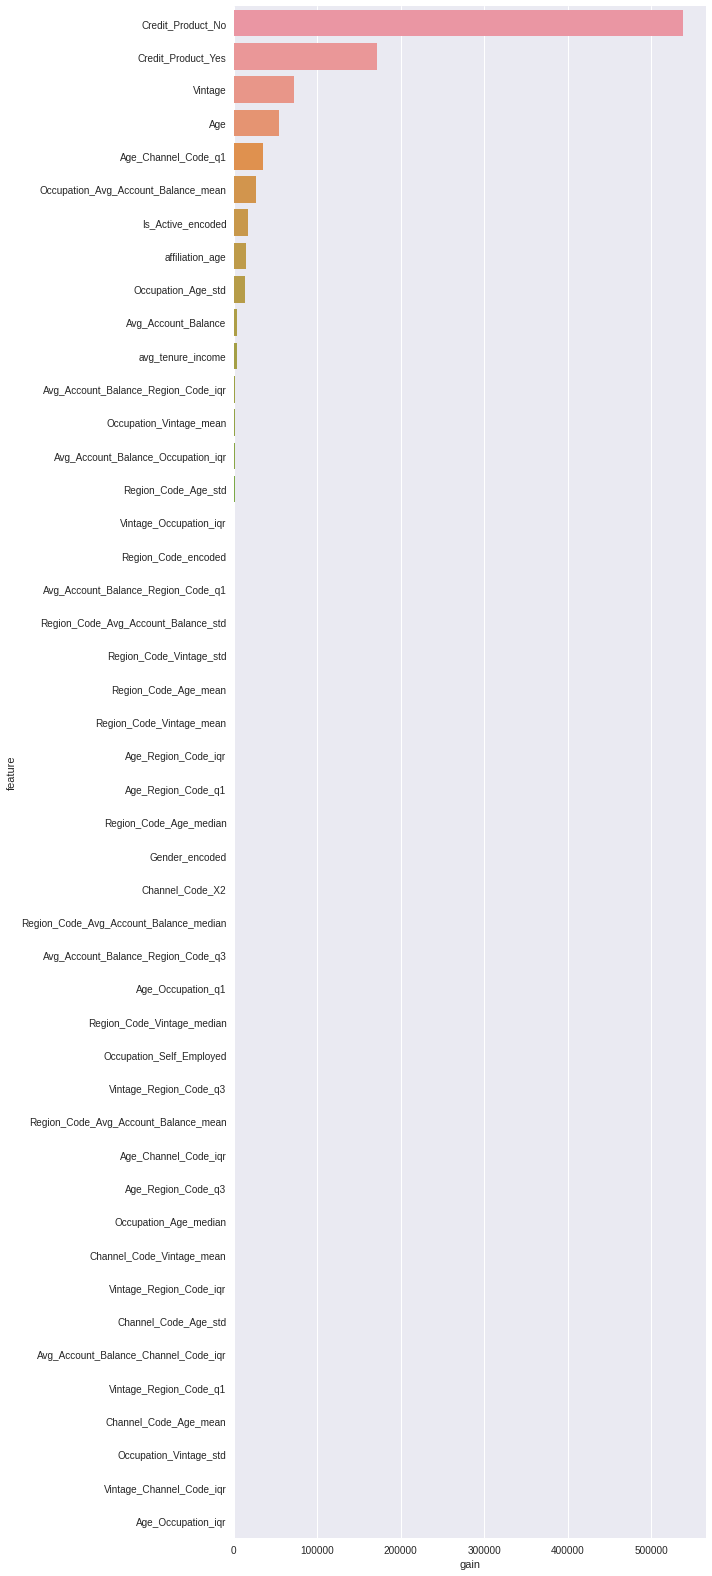

In [85]:
plot_importances(imp_df)

In [86]:
y_pred = lgb_model.model.predict(test_copy[train_cols])

In [87]:
train_cols

['Gender_encoded',
 'Is_Active_encoded',
 'Age_Region_Code_iqr',
 'Avg_Account_Balance_Region_Code_iqr',
 'Region_Code_Age_median',
 'Avg_Account_Balance_Region_Code_q3',
 'Age_Region_Code_q1',
 'avg_tenure_income',
 'Credit_Product_No',
 'Age_Channel_Code_q1',
 'Avg_Account_Balance_Region_Code_q1',
 'Age',
 'Occupation_Avg_Account_Balance_mean',
 'Avg_Account_Balance',
 'Region_Code_Avg_Account_Balance_std',
 'Region_Code_Avg_Account_Balance_median',
 'Age_Channel_Code_iqr',
 'Avg_Account_Balance_Occupation_iqr',
 'Region_Code_Vintage_median',
 'Channel_Code_Vintage_mean',
 'Region_Code_Vintage_mean',
 'Age_Region_Code_q3',
 'Vintage',
 'Occupation_Age_std',
 'Channel_Code_X2',
 'Region_Code_Vintage_std',
 'Occupation_Vintage_mean',
 'Vintage_Region_Code_q3',
 'Channel_Code_Age_std',
 'Vintage_Region_Code_iqr',
 'Vintage_Occupation_iqr',
 'Occupation_Age_median',
 'Region_Code_Avg_Account_Balance_mean',
 'Region_Code_encoded',
 'affiliation_age',
 'Channel_Code_Age_mean',
 'Region_Cod

In [88]:
test_copy['Is_Lead'] = y_pred

In [89]:
df_subm = test_copy[['ID','Is_Lead']]

In [90]:
df_subm.to_csv("submission_lgbm_16.csv",index = False)

In [ ]:
pwd

'/content'